In [22]:
import numpy as np
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import re

plot_colors = ['b', 'g', 'r', 'm', 'c', 'y', 'k']

client_band_dic = {}
client_utils_dic = {}
osds_utils_dic = {}
for operation in ["read", "write"]:
    client_band_dic[operation] = {}
    for file in glob.glob("results/client_*_*_" + operation + "_bandwidth.log"):
        f = open(file, 'r')
        data = f.read()
        data = data.strip().replace(" ","")
        data_list = data.split(',')
        obj_size = int(data_list[0])
        worker_num = int(data_list[1])
        bandwidth = float(data_list[2])
        if obj_size not in client_band_dic[operation].keys():
            client_band_dic[operation][obj_size] = []
        client_band_dic[operation][obj_size].append((worker_num, bandwidth))
    
    client_utils_dic[operation] = {}
    for file in glob.glob("results/client_*_*_" + operation + "_cpu_utils"):
        f = open(file)
        line = f.read()
        arr = []
        for i in line.split(' '):
            if re.match(r'^-?\d+(?:\.\d+)?$', i) is not None:
                arr.append(float(i))
        avg = sum(arr)/len(arr)
        match = re.match("results/client_(\d+)_(\d+)_" + operation + "_cpu_utils", file)
        obj_size = int(match.group(1))
        worker_num = int(match.group(2))
        if obj_size not in client_utils_dic[operation].keys():
            client_utils_dic[operation][obj_size] = []
        client_utils_dic[operation][obj_size].append((worker_num, avg))
        
    osds_utils_dic[operation] = {}
    for file in glob.glob("results/osd*_*_*_" + operation + "_cpu_utils"):
        f = open(file)
        line = f.read()
        arr = []
        for i in line.split(' '):
            if re.match(r'^-?\d+(?:\.\d+)?$', i) is not None:
                arr.append(float(i))
        avg = sum(arr)/len(arr)
        match = re.match("results/osd(\d+)_(\d+)_(\d+)_" + operation + "_cpu_utils", file)
        osd_index = int(match.group(1))
        obj_size = int(match.group(2))
        worker_num = int(match.group(3))
        if obj_size not in osds_utils_dic[operation].keys():
            osds_utils_dic[operation][obj_size] = {}
        if osd_index not in osds_utils_dic[operation][obj_size].keys():
            osds_utils_dic[operation][obj_size][osd_index] = []
        osds_utils_dic[operation][obj_size][osd_index].append((worker_num, avg))

print("Done.")

Done.


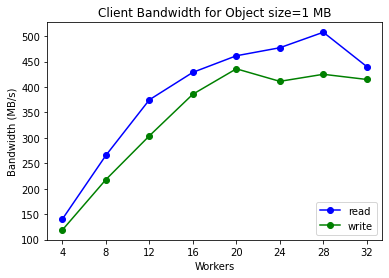

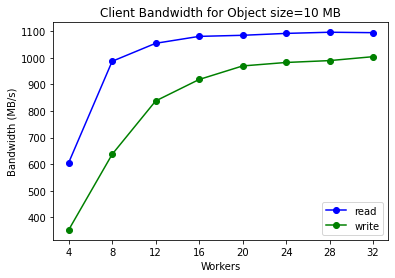

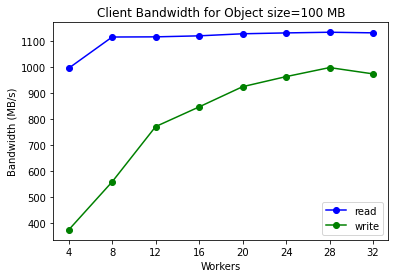

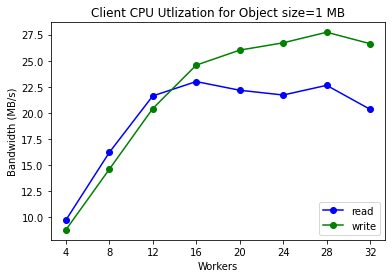

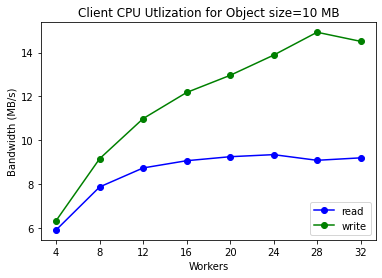

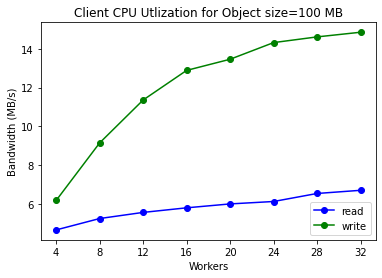

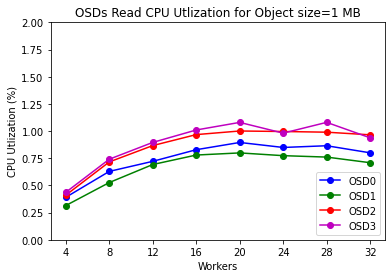

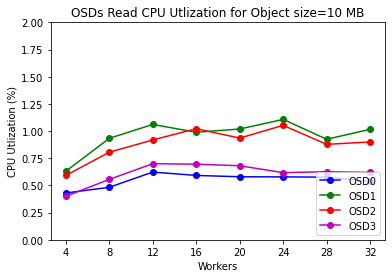

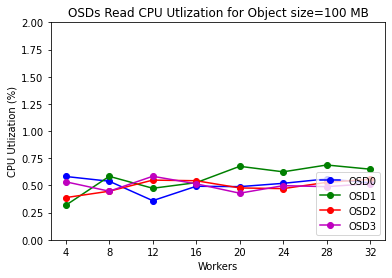

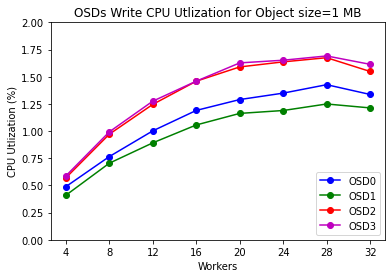

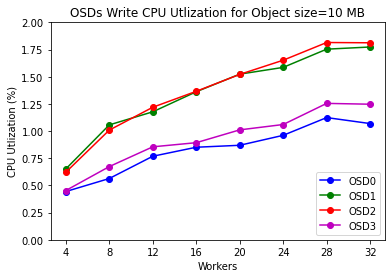

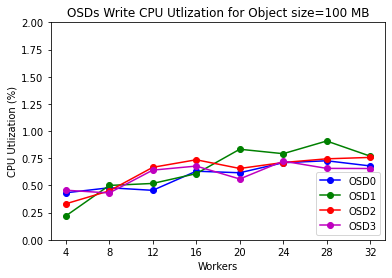

In [25]:
for obj_size in sorted(client_band_dic[operation].keys()):
    i = 0
    for operation in ["read", "write"]:
        workers = []
        bandwidth = []
        for pair in sorted(client_band_dic[operation][obj_size], key=lambda x: x[0]):
            workers.append(str(pair[0]))
            bandwidth.append(pair[1])
        plt.plot(workers, bandwidth, marker='o', color=plot_colors[i], label=operation)
        i += 1
    plt.title('Client Bandwidth for Object size='+str(obj_size)+' MB')
    plt.xlabel('Workers')
    plt.ylabel('Bandwidth (MB/s)')
    plt.legend(loc='lower right')
    plt.show()

for obj_size in sorted(client_utils_dic[operation].keys()):
    i = 0
    for operation in ["read", "write"]:
        workers = []
        utils = []
        for pair in sorted(client_utils_dic[operation][obj_size], key=lambda x: x[0]):
            workers.append(str(pair[0]))
            utils.append(pair[1])
        plt.plot(workers, utils, marker='o', color=plot_colors[i], label=operation)
        i += 1
    plt.title('Client CPU Utlization for Object size='+str(obj_size)+' MB')
    plt.xlabel('Workers')
    plt.ylabel('Bandwidth (MB/s)')
    plt.legend(loc='lower right')
    plt.show()

for operation in ["read", "write"]:
    for obj_size in sorted(osds_utils_dic[operation].keys()):
        for osds_index in sorted(osds_utils_dic[operation][obj_size].keys()):
            workers = []
            utils = []
            for pair in sorted(osds_utils_dic[operation][obj_size][osds_index], key=lambda x: x[0]):
                workers.append(str(pair[0]))
                utils.append(pair[1])
            plt.plot(workers, utils, marker='o', color=plot_colors[osds_index], label='OSD'+str(osds_index))
        plt.title('OSDs ' + operation.capitalize() + ' CPU Utlization for Object size='+str(obj_size)+' MB')
        plt.ylim(0, 2.0)
        plt.xlabel('Workers')
        plt.ylabel('CPU Utlization (%)')
        plt.legend(loc='lower right')
        plt.show()

# All in one

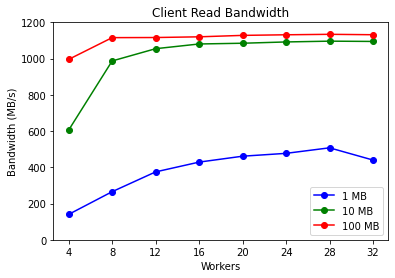

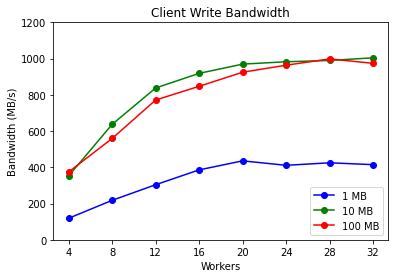

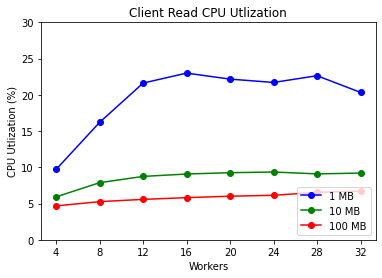

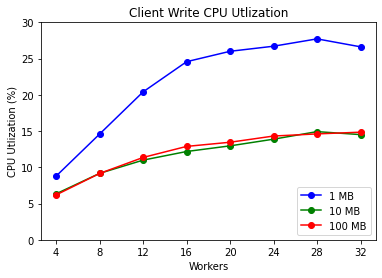

In [24]:
for operation in ["read", "write"]:
    i = 0
    for obj_size in sorted(client_band_dic[operation].keys()):
        workers = []
        bandwidth = []
        for pair in sorted(client_band_dic[operation][obj_size], key=lambda x: x[0]):
            workers.append(str(pair[0]))
            bandwidth.append(pair[1])
        plt.plot(workers, bandwidth, marker='o', color=plot_colors[i], label=str(obj_size)+' MB')
        i += 1
    plt.title('Client '+operation.capitalize()+' Bandwidth')
    plt.ylim(0, 1200)
    plt.xlabel('Workers')
    plt.ylabel('Bandwidth (MB/s)')
    plt.legend(loc='lower right')
    plt.show()

for operation in ["read", "write"]:
    i = 0
    for obj_size in sorted(client_utils_dic[operation].keys()):
        workers = []
        utils = []
        for pair in sorted(client_utils_dic[operation][obj_size], key=lambda x: x[0]):
            workers.append(str(pair[0]))
            utils.append(pair[1])
        plt.plot(workers, utils, marker='o', color=plot_colors[i], label=str(obj_size)+' MB')
        i += 1
    plt.title('Client '+operation.capitalize()+' CPU Utlization')
    plt.xlabel('Workers')
    plt.ylabel('CPU Utlization (%)')
    plt.ylim(0, 30)
    plt.legend(loc='lower right')
    plt.show()